# Importing Necessary Libraries

In [2]:
# Data handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os
from pathlib import Path
import random

# Loading Data

In [3]:

# Specify the parent directory containing train and test subdirectories
test_dir ='test_set'
train_dir = 'train_set'
# Initialize counters
total_train_images = 0
total_test_images = 0

# Count images in train set
for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    num_images = len(os.listdir(category_dir))
    print(f"Train - {category}: {num_images} images")
    total_train_images += num_images

# Count images in test set
for category in os.listdir(test_dir):
    category_dir = os.path.join(test_dir, category)
    num_images = len(os.listdir(category_dir))
    print(f"Test - {category}: {num_images} images")
    total_test_images += num_images

# Calculate total number of images
print(f"Total train images: {total_train_images}")
print(f"Total test images: {total_test_images}")


Train - BA- cellulitis: 136 images
Train - BA-impetigo: 80 images
Train - FU-athlete-foot: 118 images
Train - FU-nail-fungus: 129 images
Train - FU-ringworm: 90 images
Train - PA-cutaneous-larva-migrans: 100 images
Train - VI-chickenpox: 136 images
Train - VI-shingles: 130 images
Test - BA- cellulitis: 31 images
Test - BA-impetigo: 20 images
Test - FU-athlete-foot: 32 images
Test - FU-nail-fungus: 33 images
Test - FU-ringworm: 21 images
Test - PA-cutaneous-larva-migrans: 25 images
Test - VI-chickenpox: 34 images
Test - VI-shingles: 33 images
Total train images: 919
Total test images: 229


# Data Visualization

In [4]:
# Train Data Classes
classes = os.listdir("train_set")
classes = sorted(classes)
print(f"Total classes = {len(classes)}")
print(f"Classes: {classes}")

Total classes = 8
Classes: ['BA- cellulitis', 'BA-impetigo', 'FU-athlete-foot', 'FU-nail-fungus', 'FU-ringworm', 'PA-cutaneous-larva-migrans', 'VI-chickenpox', 'VI-shingles']


C:\Users\nada\AppData\Local\Temp\ipykernel_25640\318753259.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


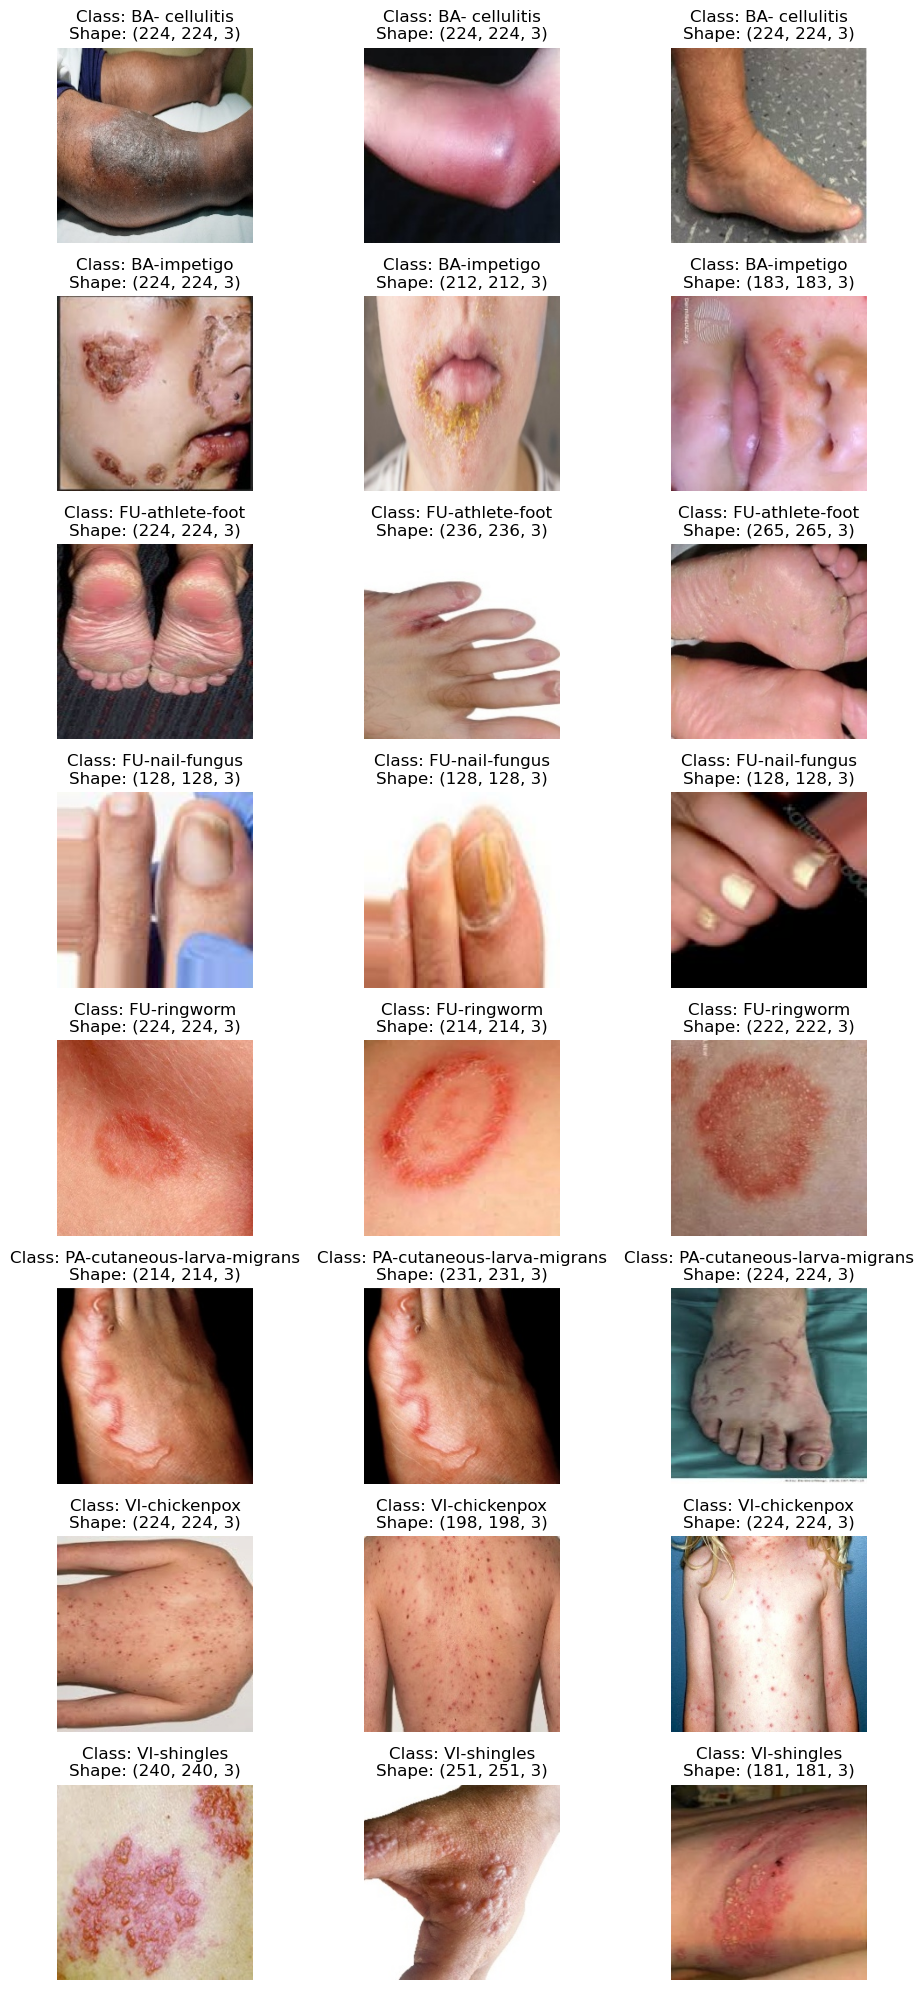

In [5]:
# visualize some images from our training set.
NUM_IMAGES = 3

fig, ax = plt.subplots(nrows = len(classes), ncols = NUM_IMAGES, figsize = (10, 20))

p = 0

for c in classes:
    img_path_class = list(Path(os.path.join(train_dir,c)).glob("*.jpg"))
    img_selected = random.choices(img_path_class, k = NUM_IMAGES)
    for i,j in enumerate(img_selected):
        img_bgr = cv2.imread(str(j))
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        ax[p,i].imshow(img_rgb)
        ax[p,i].set_title(f"Class: {c}\nShape: {img_rgb.shape}")
        ax[p,i].axis('off')

    p += 1

fig.tight_layout()
fig.show()

In [6]:
# Test Data Classes
classes = os.listdir("test_set")
classes = sorted(classes)
print(f"Total classes = {len(classes)}")
print(f"Classes: {classes}")

Total classes = 8
Classes: ['BA- cellulitis', 'BA-impetigo', 'FU-athlete-foot', 'FU-nail-fungus', 'FU-ringworm', 'PA-cutaneous-larva-migrans', 'VI-chickenpox', 'VI-shingles']


C:\Users\nada\AppData\Local\Temp\ipykernel_25640\2290868258.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


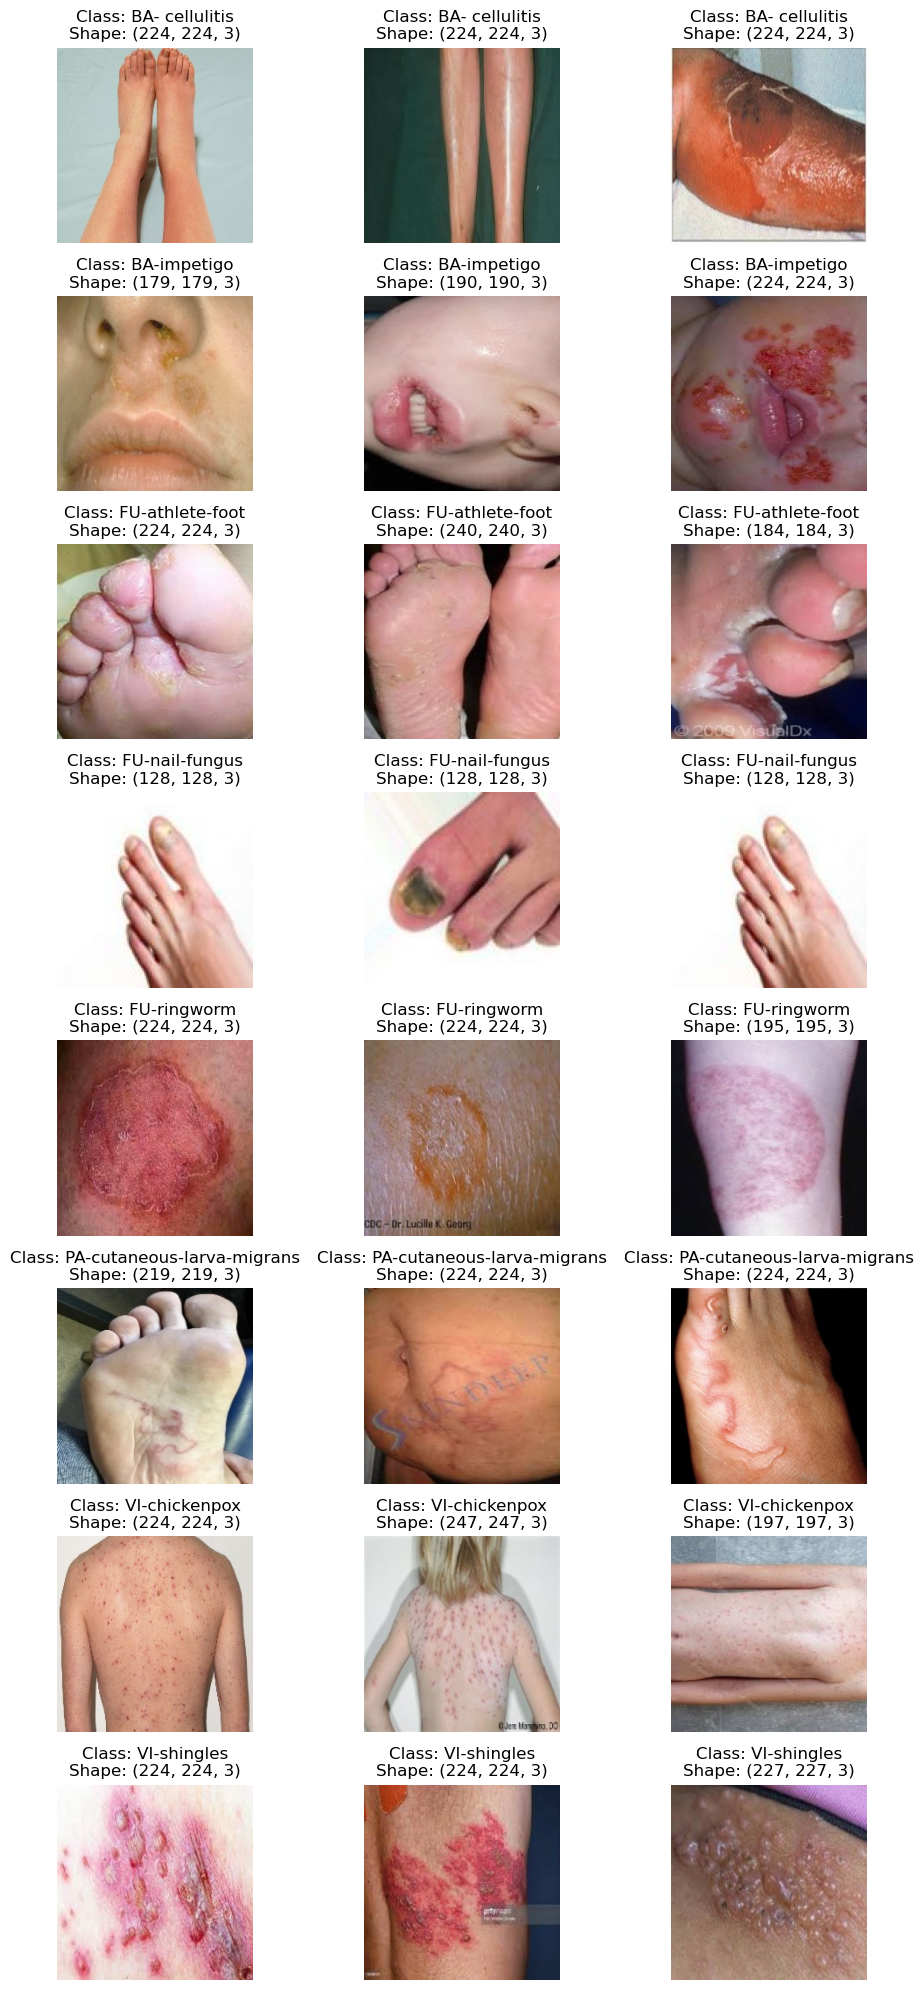

In [7]:
# visualize some images from our testing set.
NUM_IMAGES = 3

fig, ax = plt.subplots(nrows = len(classes), ncols = NUM_IMAGES, figsize = (10, 20))

p = 0

for c in classes:
    img_path_class = list(Path(os.path.join(test_dir,c)).glob("*.jpg"))
    img_selected = random.choices(img_path_class, k = NUM_IMAGES)
    for i,j in enumerate(img_selected):
        img_bgr = cv2.imread(str(j))
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        ax[p,i].imshow(img_rgb)
        ax[p,i].set_title(f"Class: {c}\nShape: {img_rgb.shape}")
        ax[p,i].axis('off')

    p += 1

fig.tight_layout()
fig.show()

# Building the Model Architicture

#Building the network

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.summary()

c:\Users\nada\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 512)      │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         1,03

 Total params: 3,667,912 (13.99 MB)

 Trainable params: 3,667,912 (13.99 MB)

 Non-trainable params: 0 (0.00 B)

# Data preprocessing

In [9]:
train_dir = 'train_set'

# rescale all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,              # target dir
    target_size=(150, 150), # resizes all images to 150x150
    class_mode='categorical'     # Binary labels needed with binary_crossentropy loss
)

Found 918 images belonging to 8 classes.


In [10]:
for data_batch, labels_batch in train_generator:
    print(f"Data batch shape: {data_batch.shape}")
    print(f"Labels batch shape: {labels_batch.shape}")
    break # Necessary because the generator yields batches indefinitely

Data batch shape: (32, 150, 150, 3)
Labels batch shape: (32, 8)


In [11]:
batch_images, batch_labels = next(train_generator)


In [12]:
integer_labels = tf.argmax(batch_labels, axis=1)


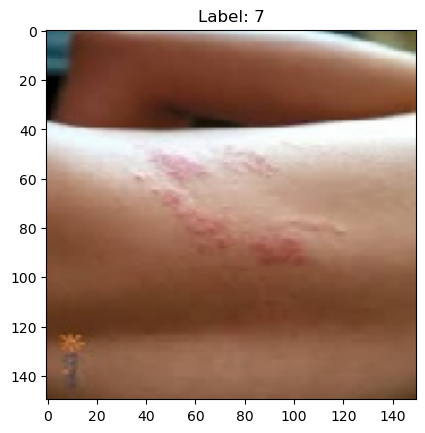

In [13]:
# Plot the first image in the batch
plt.imshow(batch_images[0])
plt.title(f"Label: {integer_labels[0]}")
plt.show()

In [14]:
test_dir = 'test_set'

# rescale all images by 1/255
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,              # target dir
    target_size=(150, 150), # resizes all images to 150x150
    batch_size=20,
    class_mode='categorical')    # Binary labels needed with binary_crossentropy loss

Found 228 images belonging to 8 classes.


In [15]:
test_images, test_labels = next(test_generator)

In [16]:
integer_labels = tf.argmax(test_labels, axis=1)

# Model Training

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'], run_eagerly=True)

In [18]:
hist = model.fit(
    train_generator,
    epochs=25,
    batch_size=15,
    )

Epoch 1/25


c:\Users\nada\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 919ms/step - accuracy: 0.1110 - loss: 2.0916
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 954ms/step - accuracy: 0.1488 - loss: 2.0417
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 908ms/step - accuracy: 0.1737 - loss: 2.0650
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 894ms/step - accuracy: 0.1868 - loss: 1.9851
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 894ms/step - accuracy: 0.1792 - loss: 2.0437
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 902ms/step - accuracy: 0.1842 - loss: 2.0361
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 971ms/step - accuracy: 0.1845 - loss: 2.0021
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 895ms/step - accuracy: 0.2350 - loss: 1.9414
Epoch 9/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 902ms/step - accuracy: 0.2175 - loss: 1.9505
Epoch 10/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 915ms/step - accuracy: 0.3032 - loss: 1.8493
Epoch 11/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 921ms/step - accuracy: 0.2861 - loss: 1.8060
Epoch 12/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 917ms/ste

# Model Testing

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.7500 - loss: 0.9831
Test accuracy: 0.75
Test loss: 0.9830726385116577


In [20]:
def getcode(index):
    class_names = {0: 'BA- cellulitis', 1: 'BA-impetigo', 2: 'FU-athlete-foot', 3: 'cFU-nail-fungus',4:'FU-ringworm',5:'PA-cutaneous-larva-migrans',
                   6:'VI-chickenpox',7:'VI-shingles'}  # Replace with your class names
    return class_names[index]

In [31]:
img = image.load_img(img_path, target_size=(224, 224))  # Adjust size as per model's requirement


In [32]:
print(img_array.shape)  # Should match the input shape of the model
predictions = model.predict(img_array)


(1, 256, 256, 3)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 512, but received input with shape (1, 2048)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 256, 256, 3), dtype=float32)
  • training=False
  • mask=None

(1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
(1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
(1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
(1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
(1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
(1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
(1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
(1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
(1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
(1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


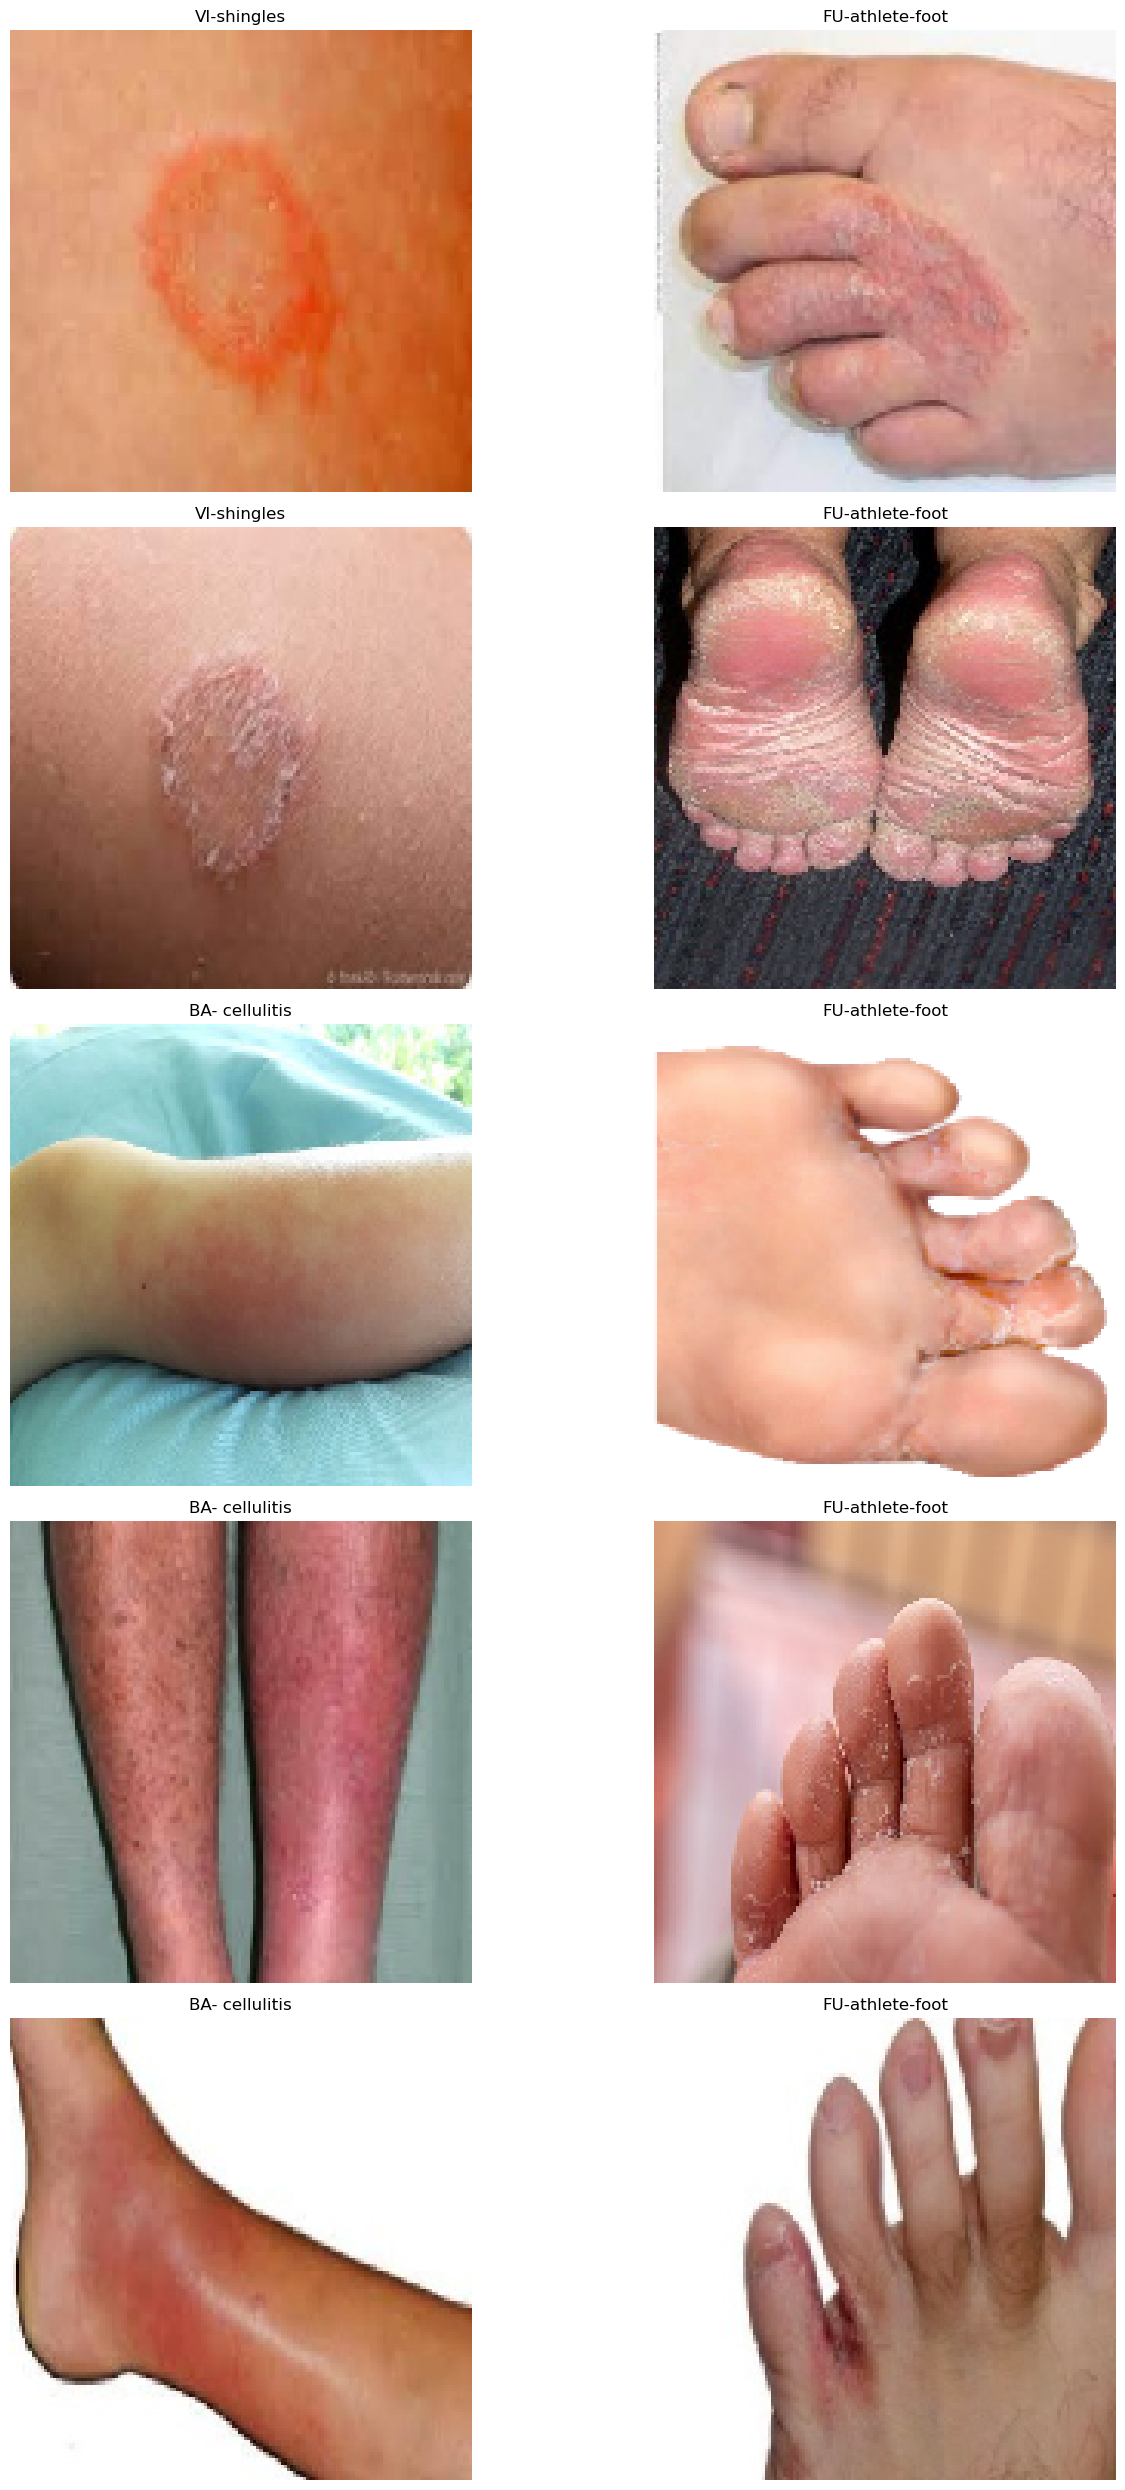

In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


folder_path = 'predict_set'

# Get a list of all the file names in the folder
file_names = os.listdir(folder_path)

# Display only the first 15 images
file_names = file_names[:15]


# Calculate the number of rows and columns for subplots
num_images = len(file_names)
num_images_per_col = 5  # Number of images per column
num_cols = 2 # Round up for columns
num_rows = num_images_per_col  # Each column will have 5 images

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Iterate through each image file
for i, file_name in enumerate(file_names):
    #Construct the full path to the image file
    img_path = os.path.join(folder_path, file_name)

    # Load the image with the right target size for your model
    img = image.load_img(img_path, target_size=(150, 150))  # resize to smaller size

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Normalize the image array (if required)
    img_array /= 255.0  # example normalization

    # Add a batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    print(img_array.shape)  # Should match the input shape of the model
    predictions = model.predict(img_array)


    # Predict the image


 
    col = i // num_images_per_col
    row = i % num_images_per_col
    ax = axes[row, col]
    ax.imshow(img)
    ax.set_title(getcode(np.argmax(predictions)))
    ax.axis('off')

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()


